<a href="https://colab.research.google.com/github/souldrive7/ECP/blob/main/%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E2%80%97%E8%AA%B2%E9%A1%8C%E2%80%97%E5%BE%8C%E8%97%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習 課題（村松先生）

### 氏名：後藤 晃郁

### 学籍番号：6025131

### 提出日：2025/5/13

# 課題

---

- 学習データ数，クラス数，特徴量数のいずれかを変化させたときのkNNの精度を比較する

- それぞれでkの値はcvを用いて最適化すること

- 結果は可視化して簡単な考察を加えること

- 提出物：jupyternotebook，pyファイル等，結果はnotebook上に示してもtext，pdf等で提出しても良い

---

# 学習データ数，クラス数，特徴量数のいずれかを変化させたときのkNNの精度を比較する

## ■内点法と単体法の比較■

### 内点法とは：
内点法（Interior Point Method, IPM）は、線形計画問題において、可行領域の内部から滑らかに最適解へ向かうアルゴリズムである。

### 課題の目的
- 線形計画問題に対する内点法と単体法の計算原理・計算量の違いを比較・理解する
- Pythonライブラリ（SciPy）を用いて両手法を実装し、目的値と計算時間を実測比較す
---

## ■手法（内点法と単体法）■

#### ♦内点法（IPM）:
- 可行解空間の内部から出発し、目的関数を改善しながら最適点に向かって滑らかに収束する

#### ♦単体法（Simplex Method）:
- 可行領域の「頂点（基本解）」に沿って、目的関数の改善方向に従い隣接する頂点間をピボット操作で移動

---

### ■具体例・モデル化■
以下の線形計画問題を例に、内点法・単体法を適用し、結果と計算時間を比較する。

#### 問題設定
\begin{aligned}
\text{maximize} \quad & 3x_1 + 2x_2 \\
\text{subject to} \quad
& x_1 + x_2 \leq 4 \\
& 2x_1 + x_2 \leq 5 \\
& x_1,\, x_2 \geq 0
\end{aligned}

この問題を SciPy の linprog 関数を用いて解く：

また、上記に加え、変数数・制約数を拡張した以下の問題についても同様に解析を行い、目的関数値、収束性、計算時間、理論計算量の特性を整理する。

| 問題規模 | 変数数（n） | 制約数（m） |
|----------|-------------|-------------|
| 小規模   | 10          | 5           |
| 中規模   | 100         | 50          |
| 大規模   | 500         | 250         |

---

#### ■実装■
Python（SciPy）を用い、次の3種類の問題サイズで内点法と単体法を比較する。

この結果を基に、問題規模に応じた手法選択の実用的指針を明らかにする。

In [ ]:
import time
import numpy as np
import pandas as pd
from scipy.optimize import linprog
from IPython.display import display
import matplotlib.pyplot as plt

# 警告を非表示
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 問題規模設定
problem_sizes = [
    {"label": "小規模", "n": 10, "m": 5},
    {"label": "中規模", "n": 100, "m": 50},
    {"label": "大規模", "n": 500, "m": 250}
]

def theoretical_complexity_ipm(n):
    return f"O({n}^3)"

def theoretical_complexity_simplex(n):
    return f"O(2^{n})"

results = []

for setting in problem_sizes:
    n, m, label = setting["n"], setting["m"], setting["label"]

    # ランダムなLP問題の生成（係数は一様乱数）
    np.random.seed(42)
    c = -np.random.uniform(1, 10, size=n)  # maximize → minimize
    A = np.random.uniform(1, 10, size=(m, n))
    b = np.random.uniform(10, 100, size=m)
    bounds = [(0, None)] * n

    # 内点法
    start_ip = time.time()
    res_ip = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='interior-point')
    end_ip = time.time()

    # 単体法
    start_sm = time.time()
    res_sm = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex')
    end_sm = time.time()

    results.append({
        "問題規模": label,
        "変数数": n,
        "制約数": m,
        "内点法_目的値": -res_ip.fun if res_ip.success else None,
        "内点法_時間[s]": end_ip - start_ip,
        "単体法_目的値": -res_sm.fun if res_sm.success else None,
        "単体法_時間[s]": end_sm - start_sm,
        "内点法_理論計算量": theoretical_complexity_ipm(n),
        "単体法_理論計算量": theoretical_complexity_simplex(n)
    })

# データフレーム化して表示
df_result_final = pd.DataFrame(results)
styled_df_final = df_result_final.style.format({
    "内点法_目的値": "{:.5f}",
    "単体法_目的値": "{:.5f}",
    "内点法_時間[s]": "{:.6f}",
    "単体法_時間[s]": "{:.6f}"
}).set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

display(styled_df_final)

# PDF保存
plt.savefig("network_chart.pdf", format='pdf', bbox_inches='tight')
plt.show()


,問題規模,変数数,制約数,内点法_目的値,内点法_時間[s],単体法_目的値,単体法_時間[s],内点法_理論計算量,単体法_理論計算量
0,小規模,10,5,80.37928,0.006980,80.37928,0.004229,O(10^3),O(2^10)
1,中規模,100,50,38.40966,0.007073,38.40966,0.072500,O(100^3),O(2^100)
2,大規模,500,250,25.93651,0.528787,25.93651,1.562029,O(500^3),O(2^500)


<Figure size 640x480 with 0 Axes>

---
## ■可視化■

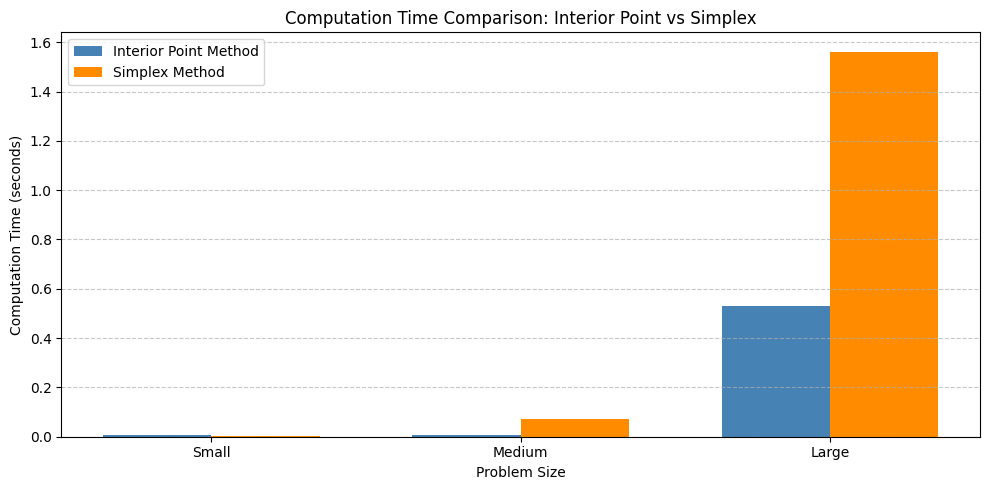

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

# 可視化用データ作成（df_result_final から）
df_time = df_result_final[[
    "問題規模",
    "内点法_時間[s]",
    "単体法_時間[s]"
]].copy()

df_time.columns = ["Problem Size", "Interior Point Time (s)", "Simplex Time (s)"]

# ヒストグラム描画
labels = df_time["Problem Size"]
ipm_times = df_time["Interior Point Time (s)"]
simplex_times = df_time["Simplex Time (s)"]

x = np.arange(len(labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - bar_width/2, ipm_times, bar_width, label='Interior Point Method', color='steelblue')
ax.bar(x + bar_width/2, simplex_times, bar_width, label='Simplex Method', color='darkorange')

ax.set_xlabel('Problem Size')
ax.set_ylabel('Computation Time (seconds)')
ax.set_title('Computation Time Comparison: Interior Point vs Simplex')
ax.set_xticks(x)
ax.set_xticklabels(['Small', 'Medium', 'Large'])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# PDF保存
plt.savefig("network_chart.pdf", format='pdf', bbox_inches='tight')
plt.show()